$$
f' = \partial_u f = \partial_u \frac{1}{1+\exp(-r(u-u_{th}))}
$$

$$= \frac{r}{(1+\exp(r(u-u_{th})))^2} = r\cdot f^2$$

curvature: 0.4453951299986585


<Figure size 640x480 with 0 Axes>

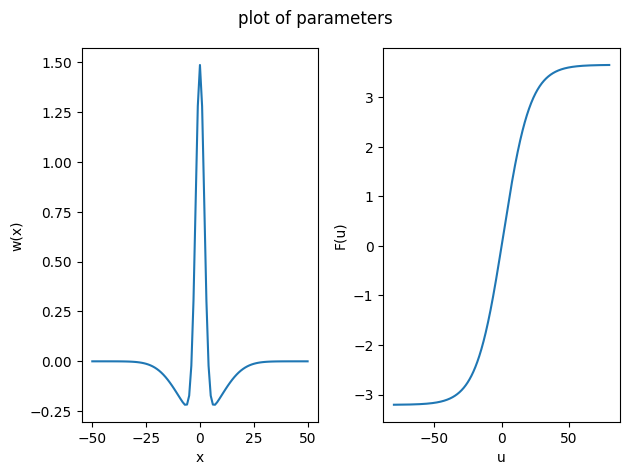

k: 0.15, β: 0.8, α: 0.3, u_th: 1.3, r: 0.1


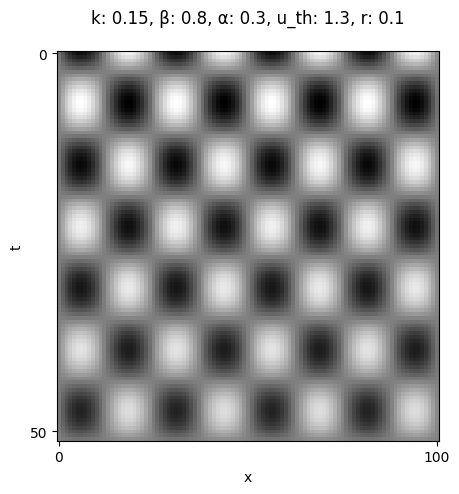

Text(0.5, 1.0, 'final shape')

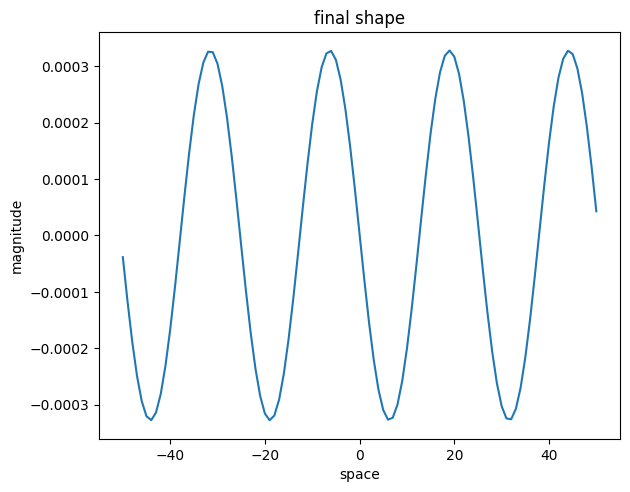

In [5]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
import scipy

plt.gray()

class Model():
    def __init__(self,dt,N_points,params):
        ## Unpacking parameters
        A,a,B,b,k,β,α,u_th,r,p = list(params.values())
        self.A,self.a,self.B,self.b,self.k,self.β,self.α,self.u_th,self.r,self.p = A,a,B,b,k,β,α,u_th,r,p 
        self.N_points   = N_points
        self.dt         = dt 
        # self.param_string = f"A: {self.A}, a: {self.a}, B: {self.B}, b: {self.b},\nk: {self.k}, β: {self.β}, α: {self.α}, u_th: {self.u_th}, r: {self.r}"
        self.param_string = f"k: {self.k}, β: {self.β}, α: {self.α}, u_th: {self.u_th}, r: {self.r}"
        
        ## Setting domain
        # self.x          = np.linspace(-np.pi,np.pi,N_points)  # Like the paper  
        self.x          = np.linspace(-50,50,N_points)        # What they seem to do
        self.dx = self.x[1]-self.x[0]

        ## Setting initial conditions
        self.u = 15*np.sin(2*np.pi*4*self.x/(self.x.max()-self.x.min())) 
        # I'll just start with 4 sines as this seems to be a decent approximation of what the final state looks like
        self.v = 0*self.u
        # self.u = np.sin(1+2*np.pi*4*self.x/(self.x.max()-self.x.min())) 
        
        
        ## Defining kernel and firing rate function
        self.w = A*a**(p/2)*np.exp(-a*self.x**2)-B*b**(p/2)*np.exp(-b*self.x**2)  # Mexican hat kernel

        self.f = lambda u : 1/(1+np.exp(np.clip(-r*(u-u_th),-100,100)))
        self.f_prime = lambda u : r*self.f(u)**2

        self.F = lambda u : k*(self.f(u)-self.f(0))/self.f_prime(0)

        ## Circular convolution as the middle-centered IFFT(FFT(F(U))*FFT(W)) times the grid spacing dx
        self.cconv = lambda signal,kernel :  self.dx*np.roll((np.fft.ifft(np.fft.fft(signal)*np.fft.fft(kernel))).real,len(signal)//2+1)

    def step(self):
        ## Following equation 4.1
        dudt = (-self.u -self.β*self.v + self.cconv(self.w,self.F(self.u)))
        dvdt = self.α*(self.u-self.v)
        ## Update step
        self.u += self.dt*dudt
        self.v += self.dt*dvdt


    def plot_params(self):
        fig,axs = plt.subplots(1,2)
        axs[0].plot(self.x,self.w)
        u_range = np.linspace(-8/self.r,8/self.r,1000)
        print("curvature:",self.F(-1e5)+self.F(1e5)-2*self.F(0))
        axs[1].plot(u_range,self.F(u_range))
        axs[0].set_ylabel("w(x)")
        axs[0].set_xlabel("x")
        axs[1].set_ylabel("F(u)")
        axs[1].set_xlabel("u")
        fig.suptitle("plot of parameters")
        fig.tight_layout()

        plt.show()


# Below a set of parameters, the first three are my attempt to copy the paper. 

parameters_stripes = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.24,
    "β" : 0,
    "α" : 0.1,
    "u_th" : 0.05,
    "r" : 0.25,
    "p" : 1}

parameters_traveling = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.26,
    "β" : 0.25,
    "α" : 0.1,
    "u_th" : 0.05,
    "r" : 0.25,
    "p" : 1}

scaling= 10
parameters_traveling_scaled = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.26,
    "β" : 0.25*scaling,
    "α" : 0.1*scaling,
    "u_th" : 0.05,
    "r" : 0.25,
    "p" : 1}

parameters_standing = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.26,
    "β" : 0.25,
    "α" : 0.1,
    "u_th" : 0.3,
    "r" : 0.25,
    "p" : 1}

parameters_standing_fix = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.26,
    "β" : 0.25,
    "α" : 0.1,
    "u_th" : 0.3,
    "r" : 0.25,
    "p" : 1}

parameters_custom = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.26,
    "β" : 0.35,
    "α" : 2,
    "u_th" : 1.6,
    "r" : 0.25,
    "p" : 1}

parameters_checkers = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.15,
    "β" : 0.8,
    "α" : 0.29,
    "u_th" : 1.3,
    "r" : 0.1,
    "p" : 1}

parameters_checkers2 = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.15,
    "β" : 0.8,
    "α" : 0.292,
    "u_th" : 1.3,
    "r" : 0.1,
    "p" : 1}


parameters_checkers2 = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.15,
    "β" : 0.8,
    "α" : 0.3,
    "u_th" : 1.3,
    "r" : 0.1,
    "p" : 1}


parameters_traveling2 = {
    "A" : 5,
    "a" : 0.125,
    "B" : 4,
    "b" : 0.005,
    "k" : 0.15,
    "β" : 0.8,
    "α" : 0.15,
    "u_th" : .3,
    "r" : 0.1,
    "p" : 1}

u_hist = []
v_hist = []

dt=0.01
model = Model(dt=dt,N_points=101,params=parameters_checkers2) 
# I'm taking an odd amount of points to get a centered convoultion, otherwise I get a drift
model.plot_params()

T = 1000
for i in range(int(T/dt)):
    model.step()
    if i*dt>T-50: # to avoid the transients, only take last 50 time units
        u_hist.append(1*model.u) 
        v_hist.append(1*model.v) 

u_hist = np.array(u_hist)
v_hist = np.array(v_hist)
print(model.param_string)

# Space-time plot


plt.imshow(u_hist[::u_hist.shape[0]//u_hist.shape[1]])

plt.suptitle(model.param_string)
plt.tight_layout()

plt.xticks([0,100],labels=["0","100"])
plt.yticks([0,100],labels=["0","50"])
plt.xlabel("x")
plt.ylabel("t")
plt.show()


# Final shape plot, to check magnitude etc
plt.plot(model.x,model.u)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.xlabel("space")
plt.ylabel("magnitude")
plt.tight_layout()
plt.title("final shape")




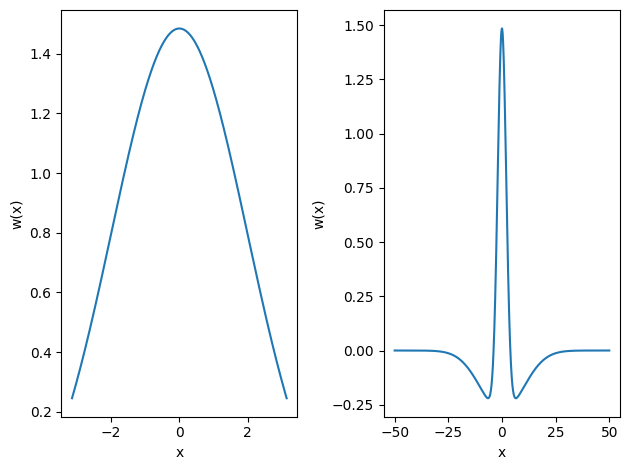

In [34]:
A,a,B,b,k,β,α,u_th,r,p = list(parameters_stripes.values())
x1 = np.linspace(-np.pi,np.pi,1000)
w1= A*a**(p/2)*np.exp(-a*x1**2)-B*b**(p/2)*np.exp(-b*x1**2)
x2 = np.linspace(-50,50,1000)
w2= A*a**(p/2)*np.exp(-a*x2**2)-B*b**(p/2)*np.exp(-b*x2**2)


fig,axs = plt.subplots(1,2)
axs[0].plot(x1,w1)
axs[0].set_ylabel("w(x)")
axs[0].set_xlabel("x")
axs[1].plot(x2,w2)
axs[1].set_ylabel("w(x)")
axs[1].set_xlabel("x")
fig.tight_layout()

0.0 1.0
0.1001001001001001 1.1052815513322825
0.2002002002002002 1.2216473077154968
0.3003003003003003 1.3502642314526905
0.4004004004004004 1.4924221444485217
0.5005005005005005 1.6495466630587137
0.6006006006006006 1.8232134947405245
0.7007007007007008 2.0151642398767593
0.8008008008008008 2.227323857240324
0.9009009009009009 2.4618199682499884
1.001001001001001 2.7210041936081373
1.1011011011011012 3.007475736292848
1.2012012012012012 3.324107447403957
1.3013013013013013 3.674074636261839
1.4014014014014016 4.060886913678077
1.5015015015015016 4.488423387735069
1.6016016016016017 4.960971565031915
1.7017017017017018 5.483270347513816
1.8018018018018018 6.060557556074373
1.9019019019019021 6.69862245751647
2.002002002002002 7.403863821633069
2.1021021021021022 8.18335409062756
2.2022022022022023 9.044910304390207
2.3023023023023024 9.997172492897755
2.4024024024024024 11.04969032188645
2.5025025025025025 12.213018860715962
2.6026026026026026 13.498824432822563
2.702702702702703 14.92